In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from math import log10, sqrt


Taking input and turning into grayscale

In [2]:
img = cv2.imread("/Users/samik/Desktop/Programming/Robot Vision Lab/eclipseHD.jpg",0).astype('float64')
print("Printing the dimensions of the image first: ")
height,width=img.shape[:2]
print("The height of the image is: ",height)
print("The width of the image is: ",width)


Printing the dimensions of the image first: 
The height of the image is:  1080
The width of the image is:  1920


adding noise to the image

In [3]:
noise = np.ones_like(img) * 0.2 * (img.max() - img.min())
rng = np.random.default_rng()
noise[rng.random(size=noise.shape) > 0.5] *= -1
img_noise = img+noise


In [4]:
cv2.imwrite("noisy_image.jpg",img_noise)

True

Text(0.5, 1.0, 'Noisy Image')

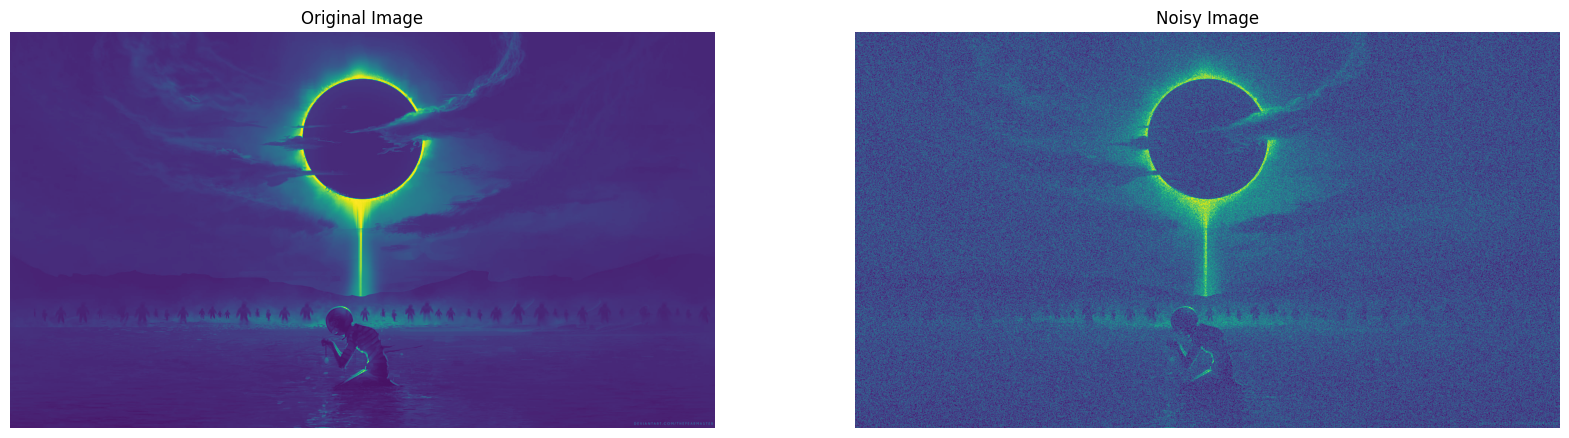

In [5]:
rows =1
columns =2
fig = plt.figure(figsize =(20,15))
fig.add_subplot(rows,columns,1)
plt.imshow(img)
plt.axis('off')
plt.title("Original Image")
fig.add_subplot(rows,columns,2)
plt.imshow(img_noise)
plt.axis('off')
plt.title("Noisy Image")

In [6]:
def pixel_by_pixel_fusion(img,img_noise,height,width):
    #fused_img = [[0 for i in range(height)] for j in range(width)]
    fused_img = np.zeros((height,width),dtype=int)
    for i in range(0,height):
        for j in range(0,width):
            if(img[i][j]>img_noise[i][j]):
                fused_img[i][j]=img[i][j]
            elif(img[i][j]<img_noise[i][j]):
                fused_img[i][j]=img_noise[i][j]
            else:
                fused_img[i][j]=img[i][j]
    return fused_img

    

In [7]:
def image_addition(img,img_noise):
    added_img = cv2.add(img,img_noise)
    return added_img

Text(0.5, 1.0, 'Added Image')

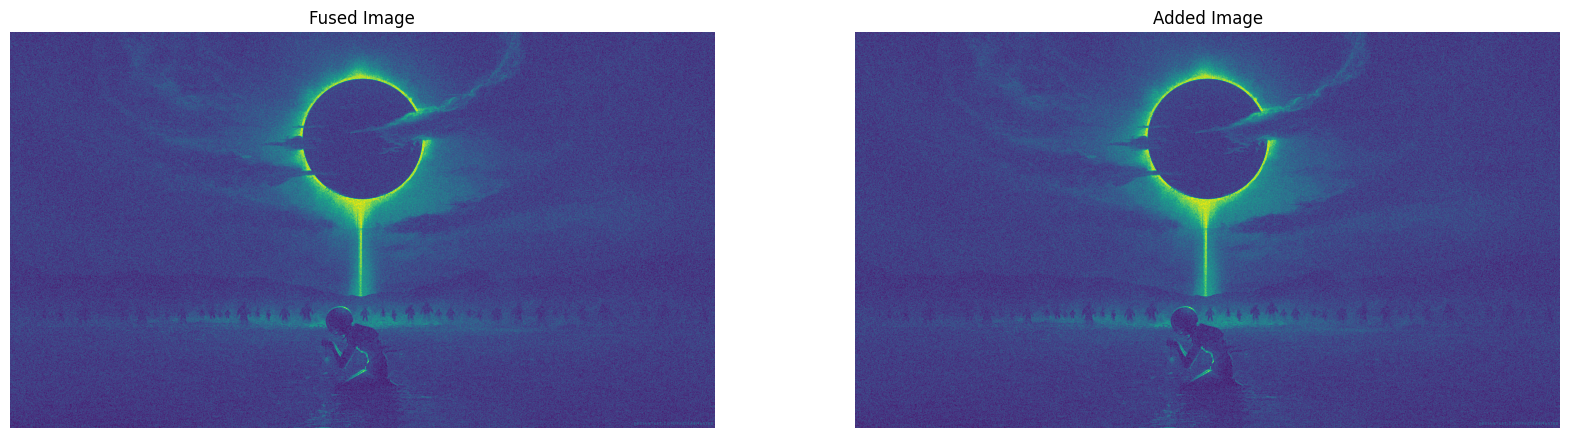

In [8]:
#saving the output images
O1 = pixel_by_pixel_fusion(img,img_noise,height,width)
cv2.imwrite("O1.jpg",O1)
O2 = image_addition(img,img_noise)
cv2.imwrite("O2.jpg",O2)

rows =1
columns =2
fig = plt.figure(figsize =(20,15))
fig.add_subplot(rows,columns,1)
plt.imshow(O1)
plt.axis('off')
plt.title("Fused Image")
fig.add_subplot(rows,columns,2)
plt.imshow(O2)
plt.axis('off')
plt.title("Added Image")

Computing metric:
Structural similarity (SSIM) index: It is a perception-based model that measures the structural similarity between images. 
MSE and PSNR : used to evaluate the deviation and compare from ground image and modified image

In [9]:
ssim_original = ssim(img,img,data_range=img.max()-img.min())  #1.0
ssim_O1 = ssim(img, O1,data_range=O1.max() - O1.min()) 
ssim_O2 = ssim(img, O2,data_range=O2.max() - O2.min()) 
ssim_O1_O2=ssim(O1, O2,data_range=O2.max() - O2.min()) 
print("The image metric SSIM for comparing the original image and the fused image is: ",ssim_O1)
print("The image metric SSIM for comparing the original image and the added image is: ",ssim_O2)
print("The image metric SSIM for comparing the fused image and the added image is: ",ssim_O1_O2)

The image metric SSIM for comparing the original image and the fused image is:  0.12065657664192149
The image metric SSIM for comparing the original image and the added image is:  0.10270107728058663
The image metric SSIM for comparing the fused image and the added image is:  0.8025076202823326


In [10]:
def PSNR(original, new):
    mse = np.mean((original - new) ** 2)
    if(mse == 0):  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

